# ForestFires Dataset  EDA and Prediction
         
            The dataset contains 517 fires from the Montesinho natural park in Portugal. For each incident weekday, month, coordinates, and the burnt area are recorded, as well as several meteorological data such as rain, temperature, humidity, and wind. The workflow reads the data and trains a regression model based on the spatial, temporal, and weather variables. The model is then used to predict the burnt area based on the current date and the coordinates where the fire  is spotted. This prediction can be used for calculating the forces sent to the incident.

In [557]:
#importing the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [558]:
#loading the dataset and is stored in a variable

f = pd.read_csv("forestfires.csv")
f

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Attribute Information


X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: "jan" to "dec"day - day of the week: "mon" to "sun"

FFMC - The FFMC (Fine Fuel Moisture Code) is one of the components of the FWI (Fire Weather Index) system.: 18.7 to 96.20.
        ,higher the FFMC value indicates drier and more flammable conditions, while a lower value suggests moister conditions            with reduced fire risk.

DMC - The DMC (Duff Moisture Code) is another component of the FWI (Fire Weather Index) system: 1.1 to 291.3
      ,higher DMC value indicates drier conditions with increased fire risk, while a lower value suggests moister conditions         with reduced fire risk.

DC - The DC(Drought Code) index from the FWI (Fire Weather Index)  system: 7.9 to 860.6
     ,higher Drought Code value indicates drier soil conditions, which can contribute to increased fire danger. 


ISI - ISI (Initial Spread Inde)x from the FWI (Fire Weather Index)  system: 0.0 to 56.10 ,higher ISI values indicate a greater potential for rapid fire spread, while lower values suggest a lower potential for rapid spread.
      

temp - temperature in Celsius degrees: 2.2 to 33.30, higher temperatures can increase the likelihood of ignition and promote          fire spread.

RH - relative humidity in %: 15.0 to 100,higher relative humidity levels indicate moister conditions, which can reduce the          likelihood of fire ignition and slow the rate of fire spread.

wind - wind speed in km/h: 0.40 to 9.40, high wind speeds can accelerate the spread of fires by carrying embers and flames across larger distances

rain - outside rain in mm/m^2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may 
make sense to model with the logarithm transform).

In [559]:
f.shape  #To know the the no:of columns and rows in the datset

(517, 13)

## Data Cleaning and Preparation

In [560]:
f.head(50)    #viweing the first 50 columns of the dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [561]:
f.tail(50)   #viweing the last 50 columns of the datset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
467,3,4,mar,wed,90.2,18.5,41.1,7.3,11.2,41,5.4,0.0,5.55
468,6,5,mar,thu,91.3,20.6,43.5,8.5,13.3,27,3.6,0.0,6.61
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13
470,5,4,apr,sun,91.0,14.6,25.6,12.3,17.6,27,5.8,0.0,0.00
471,4,3,may,fri,89.6,25.4,73.7,5.7,18.0,40,4.0,0.0,38.48
472,8,3,jun,mon,88.2,96.2,229.0,4.7,14.3,79,4.0,0.0,1.94
473,9,4,jun,sat,90.5,61.1,252.6,9.4,24.5,50,3.1,0.0,70.32
474,4,3,jun,thu,93.0,103.8,316.7,10.8,26.4,35,2.7,0.0,10.08
475,2,5,jun,thu,93.7,121.7,350.2,18.0,22.7,40,9.4,0.0,3.19
476,4,3,jul,thu,93.5,85.3,395.0,9.9,27.2,28,1.3,0.0,1.76


In [562]:
f.info()      

  #information about the datset 
  #it contains no null values
   #contains float,integer,string type values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [563]:
f.describe()

    # statistical decription about each columns 

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Data Analysing

In [564]:
f['month'].value_counts()
          #identifying the months with the frequent occurrences of forest fires

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [565]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
f_new = f.set_index("month").loc[month_order].reset_index()
print(f_new)

 #setting a new dataframe which is in the order of the months
      #set_index, sets the 'month'' column as the index of the DataFrame
      #loc[month_order],  ensures that the rows are arranged in the order of months specified in the month_order list   
      #reset_index, resets a new column with the original index values

    month  X  Y  day  FFMC   DMC     DC  ISI  temp   RH  wind  rain   area
0     jan  2  4  sat  82.1   3.7    9.3  2.9   5.3   78   3.1   0.0   0.00
1     jan  4  5  sun  18.7   1.1  171.4  0.0   5.2  100   0.9   0.0   0.00
2     feb  2  2  mon  84.0   9.3   34.0  2.1  13.9   40   5.4   0.0   0.00
3     feb  2  2  fri  86.6  13.2   43.0  5.3  12.3   51   0.9   0.0   0.00
4     feb  9  9  thu  84.2   6.8   26.6  7.7   6.7   79   3.1   0.0   0.00
..    ... .. ..  ...   ...   ...    ...  ...   ...  ...   ...   ...    ...
512   dec  3  4  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0  10.73
513   dec  4  4  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0  22.03
514   dec  4  4  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0   9.77
515   dec  4  6  fri  84.7  26.7  352.6  4.1   2.2   59   4.9   0.0   9.27
516   dec  6  5  tue  85.4  25.4  349.7  2.6   5.1   24   8.5   0.0  24.77

[517 rows x 13 columns]


#### Analyzing data according to the order of months provides insights into temporal patterns, trends, and variations in the dataset.

<Axes: xlabel='month', ylabel='count'>

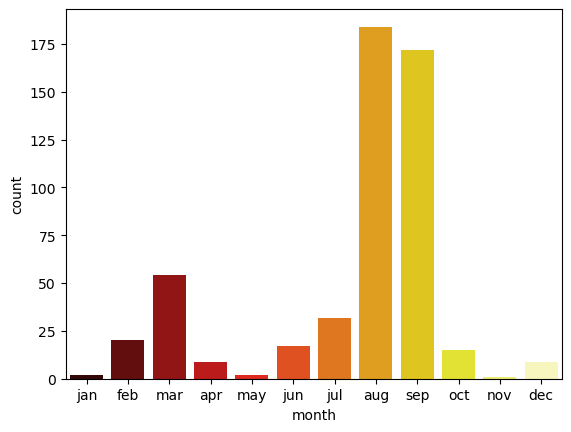

In [566]:
sns.countplot(x='month',data=f_new,palette='hot')

  #plotting the change in recordings of the forest fires with months

### Months recordings with most significant increase in forest fires.

In [30]:
f_aug= f_new['month']=='aug'
aug=f[f_aug]   #recorded values in the month aug
aug

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
136,3,6,sep,sun,92.4,124.1,680.7,8.5,17.2,58,1.3,0.0,0.00
137,3,6,sep,mon,90.9,126.5,686.5,7.0,15.6,66,3.1,0.0,0.00
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,3,4,sep,wed,91.2,134.7,817.5,7.2,18.5,30,2.7,0.0,0.00
316,4,5,sep,thu,92.4,96.2,739.4,8.6,18.6,24,5.8,0.0,0.00
317,4,4,sep,thu,92.4,96.2,739.4,8.6,19.2,24,4.9,0.0,3.78
318,6,5,sep,thu,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0,0.00


In [32]:
f_sep= f_new['month']=='sep'
sep=f[f_sep]   #recorded values in the month sep
sep

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
320,6,3,sep,thu,92.8,119.0,783.5,7.5,18.9,34,7.2,0.0,34.36
321,1,4,sep,thu,92.8,119.0,783.5,7.5,16.8,28,4.0,0.0,7.21
322,6,5,sep,thu,92.8,119.0,783.5,7.5,16.8,28,4.0,0.0,1.01
323,3,5,sep,thu,90.7,136.9,822.8,6.8,12.9,39,2.7,0.0,2.18
324,6,5,sep,thu,88.1,53.3,726.9,5.4,13.7,56,1.8,0.0,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,5,4,aug,tue,95.1,141.3,605.8,17.7,26.4,34,3.6,0.0,16.40
488,4,4,aug,tue,95.1,141.3,605.8,17.7,19.4,71,7.6,0.0,46.70
489,4,4,aug,wed,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0,0.00
490,4,4,aug,wed,95.1,141.3,605.8,17.7,28.7,33,4.0,0.0,0.00


### Exploring the months with relatively few occurrences of forest fires

In [13]:
f_nov= f_new['month']=='nov'
f[f_nov]   #recorded values in nov

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0


In [14]:
f_may= f_new['month']=='may'
f[f_may]   #recorded values in may

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
85,1,2,sep,thu,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,0.0
86,1,2,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,0.0


### Analyzing how the recorded values of forest fires correspond to the increase in temperature across different months

In [10]:
f_new.sort_values(by=['month','temp'], ascending=True)

# increase in tempreture may cause in forest fires and can vary accross months

,month,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
77,apr,6,5,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,4.61
78,apr,6,5,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,10.93
76,apr,6,4,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0.0,0.00
82,apr,6,5,mon,87.9,24.9,41.6,3.7,10.9,64,3.1,0.0,3.35
79,apr,7,5,sun,81.9,3.0,7.9,3.5,13.4,75,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,sep,1,5,sun,93.5,149.3,728.6,8.1,27.8,27,3.1,0.0,95.18
400,sep,4,6,sun,93.5,149.3,728.6,8.1,28.3,26,3.1,0.0,64.10
374,sep,2,4,sat,93.4,145.4,721.4,8.1,28.6,27,2.2,0.0,1.61
373,sep,1,5,sat,93.4,145.4,721.4,8.1,29.6,27,2.7,0.0,1.46


In [16]:
import warnings
warnings.filterwarnings("ignore")  #to run cells without warnings

### Average Temperature v/s Recorded Forest Fires Across Months

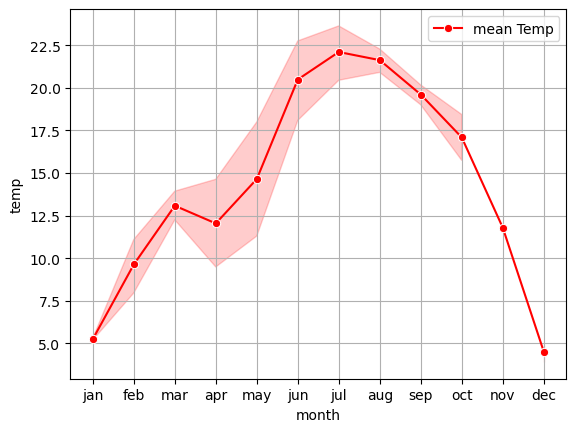

In [17]:
sns.lineplot(x='month', y='temp', data=f_new, estimator='mean', marker='o', color='r', label='mean Temp')
plt.grid()#for grid lines

 #Analyzing how the recorded values of forest fires correspond to the increase in temperature across different months
        #estimator=mean ,for getting mean values of the temp
        #marker='o', for marking the temp values
        
   #plot shows that In July,Aug,Sep months temp is high, which may cause in forest fire    

###  Spatial Distribution of Forest Fires by Month

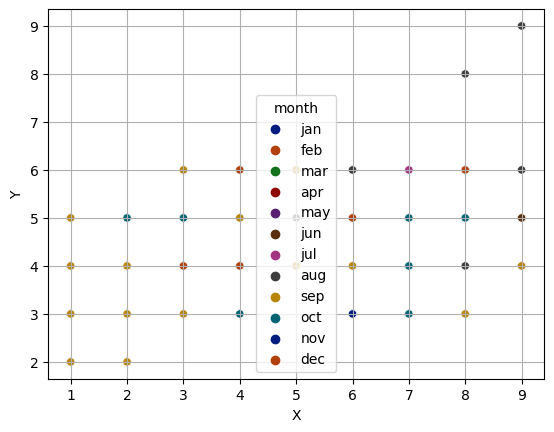

In [29]:
sns.scatterplot(x='X', y='Y', data=f_new,hue='month',marker='o',palette='dark')
plt.grid()

    #plot showing spatial distribution of forest fires that spread accross distrbution
      #it shows that coordinates (9,9),(8,8) is from the month Aug,which has max spread of forest fire

### Average FFMC Across Months

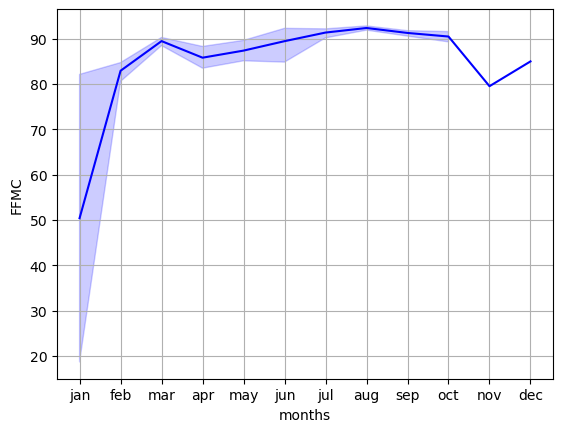

In [20]:
sns.lineplot(x='month',y="FFMC",data=f_new,color='b',estimator='average')#estimator for estimated value output
plt.ylabel('FFMC')#lebelling
plt.xlabel('months')
plt.grid()

#high FFMC value indicates that fine fuels are dry and promoting rapid fire spread under favorable weather conditions.
#As shown,in Jul,Aug,Sep months FFMC rate is high,leads to forest fire

### DMC accross Months


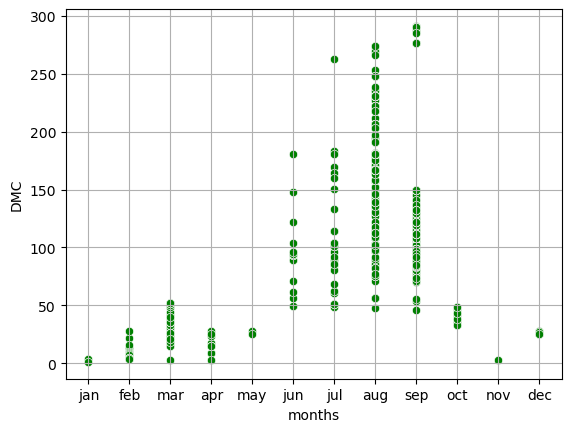

In [34]:
sns.scatterplot(x='month',y="DMC",data=f_new,color='g')
plt.ylabel('DMC')
plt.xlabel('months')
plt.grid()

#Higher DMC values indicate lower moisture content in the duff layer, and leads to rapid fire spread 
   #In Aug,Sep months DMC rate is higher that may cause forest fires

### DC accross months

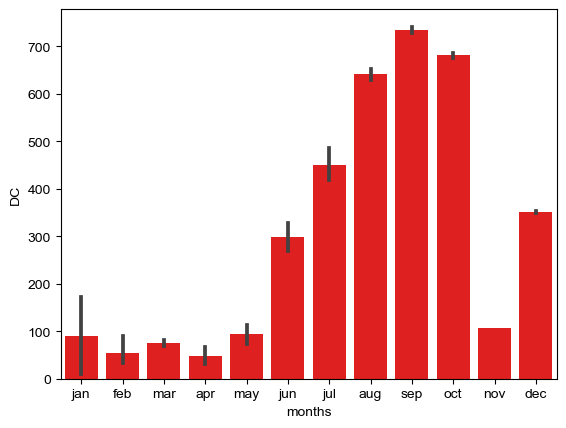

In [22]:
sns.barplot(x='month', y='DC', data=f_new, color='r')
plt.ylabel('DC')
plt.xlabel('months')
sns.set(style='darkgrid')

#higher DC value can contribute to forest fires
  #plot shows DC rates are higher in Aug,Sep,Oct months

### ISI  accross months

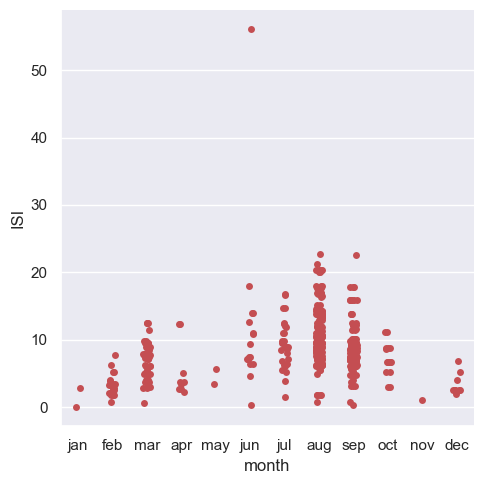

In [23]:
sns.catplot(x='month', y='ISI', data=f_new, color='r')

sns.set(style='darkgrid')


#Higher ISI values indicate conditions that are more conducive to rapid fire spread
  # high ISI values increase the risk of forest fires,is higher in Jun,Aug,Sep

### Relative Humidity accross months

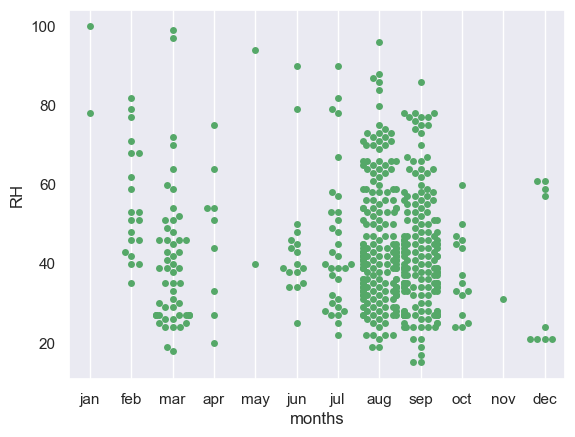

In [24]:
sns.swarmplot(x='month',y="RH",data=f_new,color='g')
plt.ylabel('RH')
plt.xlabel('months')
plt.grid()

 #Low relative humidity levels indicate dry air, which can lead to increased evaporation and drying cause forest fires
    #In Aug,Sep months RH rate is low,leading to low moisture,dry land.

### Rain occurence accross months

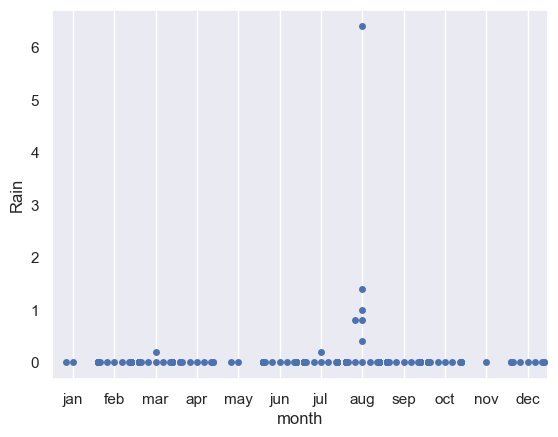

In [25]:
sns.swarmplot(y='rain',x='month',data=f_new)
plt.ylabel('Rain')
plt.xlabel('month')
plt.grid()

#lower values or zero indicate, lighter or no rainfall
 #shows that in Aug,rainfall rate in 0,which means lighter rainfall

### Distribution of Area burned accross each month 

<Axes: xlabel='month', ylabel='area'>

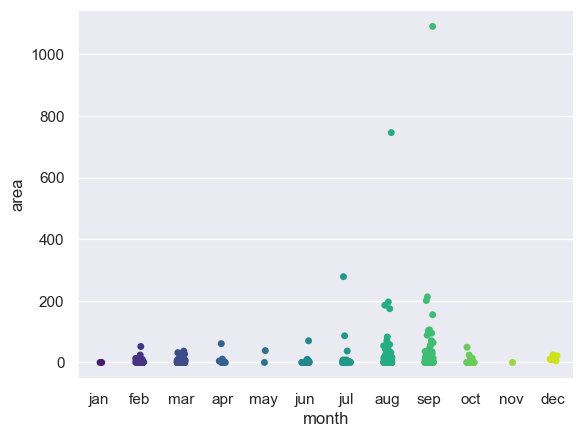

In [26]:
sns.stripplot(x='month', y='area', data=f_new, palette='viridis')

#Compare the burned area across different months
#plot shows that in Aug,Sep months ,a vast area of rapid fires has occured

## Wind accross months


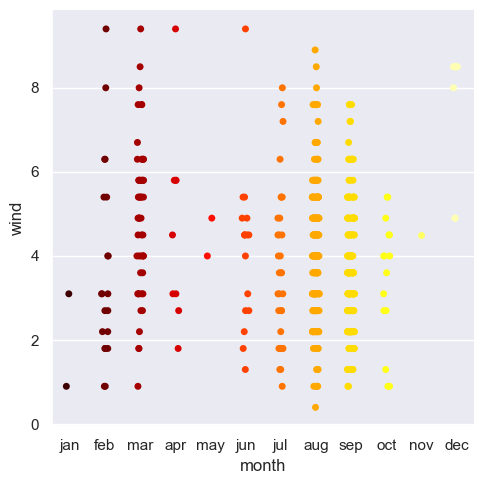

In [570]:
sns.catplot(x='month',y='wind',data=f_new,palette='hot')
sns.set(style='darkgrid')

# it shows that in months feb,March,apr,Jun wind speed is greater,and it might be a reason for forestfires

<Axes: >

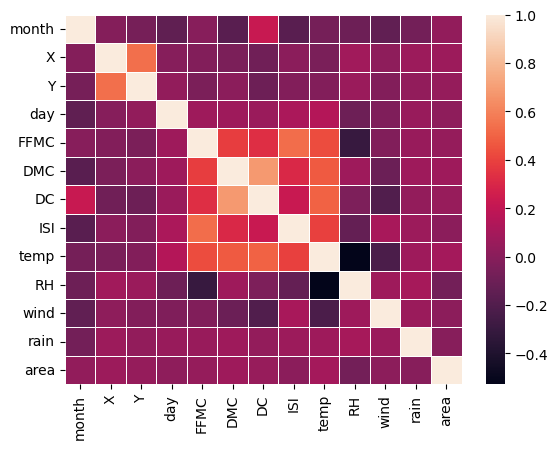

In [41]:
#for analyzing the relationships b/w the varibale and pattern in data

sns.heatmap(f_new.corr(),cbar=True,linewidth=0.5)

## Conclusion

   The EDA highlights the complex interplay between environmental, spatial, and human factors in determining forest fire occurrences. Understanding these patterns and relationships is essential for developing effective strategies for fire prevention, mitigation, and response. By leveraging machine learning models trained on historical data, stakeholders can better anticipate and manage forest fire risks, ultimately safeguarding both natural ecosystems and human communities.

## Machine Learning
    
    
    Here Another forestfire dataset is been used for Meachine learning for the insight predicting. For real-world forest fires are a significant environmental hazard with potentially devastating consequences for ecosystems, wildlife, property, and human lives.

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
#Loading new dataset Forestfires .csv for ML

F = pd.read_csv("Forestfires .csv")
F

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Attribute Details

month: Month of the year (categorical)

day: Day of the week (categorical)

FFMC: Fine Fuel Moisture Code index from the FWI system (continuous)

DMC: Duff Moisture Code index from the FWI system (continuous)

DC: Drought Code index from the FWI system (continuous)

ISI: Initial Spread Index from the FWI system (continuous)

temp: Temperature in Celsius degrees (continuous)

RH: Relative Humidity in percentage (%) (continuous)

wind: Wind speed in km/h (continuous)

rain: Outside rain in mm/m2 (continuous)

area: The burned area of the forest in hectares (continuous)

dayfri to daywed: Binary indicators for each day of the week (1 if the day is present, 0 otherwise)

monthapr to monthsep: Binary indicators for each month of the year (1 if the month is present, 0 otherwise)

size_category: Size category of the fire (binary or categorical)

In [414]:
#information about the new dataset F
F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [412]:
#Dropping the null values

F.drop_duplicates(inplace=True)
F

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [533]:
#First 100 rows of the dataset

fire=F.head(100)
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3,2,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,...,1,0,0,0,0,0,0,0,0,1
97,7,2,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,...,0,0,0,0,1,0,0,0,0,1
98,1,3,91.4,142.4,601.4,10.6,11.6,87,4.5,0.0,...,0,0,0,0,0,0,0,0,0,1
99,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1


In [535]:
#for ignoring warning 

import warnings
warnings.filterwarnings("ignore")


### Encoding Data

In [536]:
#used to encode categorical labels into numerical labels. 
from sklearn.preprocessing import LabelEncoder

In [550]:
l=LabelEncoder()#Intializing
fire['month']=l.fit_transform(fire['month']) #fitting and transform
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,6,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,6,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,5,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,5,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,2,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,...,1,0,0,0,0,0,0,0,0,0
97,5,2,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,...,0,0,0,0,1,0,0,0,0,0
98,1,3,91.4,142.4,601.4,10.6,11.6,87,4.5,0.0,...,0,0,0,0,0,0,0,0,0,0
99,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
l=LabelEncoder()
fire['day']=l.fit_transform(fire['day'])
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,6,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,6,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,5,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,5,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,2,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,...,1,0,0,0,0,0,0,0,0,1
97,5,2,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,...,0,0,0,0,1,0,0,0,0,1
98,1,3,91.4,142.4,601.4,10.6,11.6,87,4.5,0.0,...,0,0,0,0,0,0,0,0,0,1
99,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1


In [539]:
l=LabelEncoder()
fire['size_category']=l.fit_transform(fire['size_category'])
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,6,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,6,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,5,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,5,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,2,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,...,1,0,0,0,0,0,0,0,0,0
97,5,2,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,...,0,0,0,0,1,0,0,0,0,0
98,1,3,91.4,142.4,601.4,10.6,11.6,87,4.5,0.0,...,0,0,0,0,0,0,0,0,0,0
99,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0


####  The independent variables  are, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, day friday to day wed, month april to month sep ,the dependent variable or target is area ,the burned area of the forest.

In [551]:
#Slicing the dependent variable

x=fire.drop("area",axis=1).values
x

array([[ 5. ,  0. , 86.2, ...,  0. ,  0. ,  0. ],
       [ 6. ,  5. , 90.6, ...,  1. ,  0. ,  0. ],
       [ 6. ,  2. , 90.6, ...,  1. ,  0. ,  0. ],
       ...,
       [ 1. ,  3. , 91.4, ...,  0. ,  0. ,  0. ],
       [ 1. ,  3. , 91.4, ...,  0. ,  0. ,  0. ],
       [ 1. ,  5. , 88.8, ...,  0. ,  0. ,  0. ]])

In [552]:
#slicing the indpendent variables
y=fire.iloc[:,10].values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [507]:
#spliting used in machine learning to evaluate the performance of a model on unseen data.

from sklearn.model_selection import train_test_split

In [508]:
#To split a dataset into training and testing sets for model training and evaluation

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=10,random_state=10)

In [553]:
# training the independent features

x_train

array([[ 6. ,  2. , 90.6, ...,  1. ,  0. ,  0. ],
       [ 6. ,  5. , 90.6, ...,  1. ,  0. ,  0. ],
       [ 5. ,  3. , 89.3, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. ,  4. , 91.7, ...,  0. ,  0. ,  0. ],
       [ 7. ,  0. , 93.3, ...,  0. ,  1. ,  0. ],
       [ 7. ,  2. , 92.5, ...,  0. ,  1. ,  0. ]])

In [554]:
#training the target variable
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [555]:
#testing the features
x_test

array([[0.000e+00, 2.000e+00, 8.630e+01, 2.740e+01, 9.710e+01, 5.100e+00,
        9.300e+00, 4.400e+01, 4.500e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [7.000e+00, 6.000e+00, 9.290e+01, 1.333e+02, 6.996e+02, 9.200e+00,
        2.640e+01, 2.100e+01, 4.500e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [7.000e+00, 2.000e+00, 9.250e+01, 8.800e+01, 6.986e+02, 7.100e+00,
        1.960e+01, 4.800e+01, 2.700e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e

In [556]:
#testing the target variable
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## To check the  Accuracy using linear reg

In [509]:
#importing Linear reg model from scikit learn
from sklearn.linear_model import LinearRegression

In [510]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()# fitting the model
regressor.fit(x_train,y_train)

LinearRegression()

In [511]:
#the predictions made by the model on the input features
xpred = regressor.predict(x_train)
xpred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [512]:
ypred = regressor.predict(x_test)
ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [513]:
score= regressor.score(x_train,y_train)
score

1.0

In [547]:
testingscore1= regressor.score(x_test,y_test)
testingscore1

1.0

## To check the Accuracy using DecisonTree reg

In [515]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=10,random_state=10)

In [516]:
from sklearn.tree import DecisionTreeRegressor

In [517]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [518]:
xpred = dtr.predict(x_train)
xpred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [519]:
ypred = dtr.predict(x_test)
ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [520]:
score=dtr.score(x_train,y_train)
score

1.0

In [521]:
testingscore2 = dtr.score(x_test,y_test)
testingscore2

1.0

## To Check the Accuracy using RandomForest Reg

In [522]:
from sklearn.ensemble import RandomForestRegressor

In [523]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [524]:
xpred = rfr.predict(x_train)
xpred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [525]:
ypred = rfr.predict(x_test)
ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [526]:
testingscore3 = rfr.score(x_test,y_test)
testingscore3

1.0

## To check the Accuaracy using SVR

In [527]:
from sklearn.svm import SVR

In [528]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [529]:
xpred=svr.predict(x_train)
xpred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [530]:
ypred=svr.predict(x_test)
ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [531]:
score= svr.score(x_train,y_train)
score

1.0

In [546]:
testingscore4= svr.score(x_test,y_test)
testingscore4

1.0

In [544]:
#To check whethre the predicted and actual values is corrector not

data = {'actual':y_test,'predict':ypred,'correct':y_test==ypred}
b=pd.DataFrame(data)
b

,actual,predict,correct
0,0.0,0.0,True
1,0.0,0.0,True
2,0.0,0.0,True
3,0.0,0.0,True
4,0.0,0.0,True
5,0.0,0.0,True
6,0.0,0.0,True
7,0.0,0.0,True
8,0.0,0.0,True
9,0.0,0.0,True


In [548]:
w = pd.DataFrame({'mlmodel':['linear','dtr','rfr','svr'],
                 'accuracy score':[testingscore1,testingscore2,testingscore3,testingscore4]})
w

  #Displaying the Accuracy score of ecah regression
      #it shows that each reg shows 100% accuracy

,mlmodel,accuracy score
0,linear,1.0
1,dtr,1.0
2,rfr,1.0
3,svr,1.0


<Axes: xlabel='mlmodel', ylabel='accuracy score'>

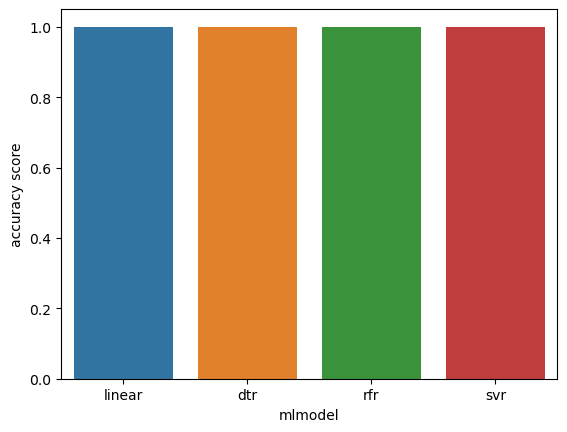

In [549]:
sns.barplot(x='mlmodel',y='accuracy score',data=w)

                  #barplot representing the accuaracies of the data in d/f regression

## Conclusion Of the Prediction

        All four machine learning models on the first 100 values of the forest fires dataset suggests that the models were able to learn the underlying patterns in the data exceptionally well.Additionally, further analysis and exploration of the dataset may provide insights into the factors contributing to the prediction accuracy. Also Forestfires are the phenomenon occurs in the nature which are unpredictable in the real-world,therefore predicting a specific data can help only with in limitions. 